<h1>Introduction</h1>
<p>In these lab notes we will introduce you to Naïve Bayes and your task is to implement a relatively simple spam filter.  We will use small data sets to train and test the model (available on Blackboard). </p> 
    
<p>The messages within the datasets have already been classified as ham (not spam), or spam. </p> 
<ul>
    <li>Data Set 1 consists of 5572 messages</li> 
    <li>Data Set 2 consists of 5728 messages</li>  
</ul>
    
<p>You will primarly be using Data Set 1, and you should submit your solution for this data set.  Data Set 2 allows for further testing of your implementation and just for you to experiment.</p>

<p>The implementation of a Naïve Bayes Spam Filter is relatively straight forward using scikit-learn, however, this library hides the implementation details (and many solutions are available on the Internet).  Therefore, this task does not permit the use of the scikit-learn library or similar libraries that perform similar tasks.  We hope that this will help with your understanding of the implementation details.</p> 
<p>Bayes Theorem can give us the probability that a message is spam S for a given event E</p>

<h1>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h1>

<p>Where:</p>
<p>$P\left(S\middle|\ E\right)$, the probability that the message is spam given the event occurred.</p>
<p>$P\left(S\right)$, the prior probability that a message is spam.</p>
<p>$P\left(\lnot S\right)$, the prior probability that a message is not spam.  </p>

Note:  $P\left(S\right)$ and $P\left(\lnot S\right)$ are prior values, or prior beliefs.  This value could be calculated using the number of spam and number of ham classifications in the data set.  You could also use arbitrary values, for example; you could assume that of all email messages sent, 80% of them are spam and 20% of them are not spam.  The success of the filter depends on the prior values.

<p>$P\left(E\middle|\ S\right)$, the probability that event E occurs in a spam emails.</p>

<p>$P\left(E|\lnot S\right)$, the probability that event E occurs in non-spam emails.</p>

<h3>Additional Libraries</h3>
<p>As you progress through the exercises you may need additional libraries that are not installed, for example when visualising the data you may need to import WordCloud.  If you use [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) the necessary libraries will be available, which will save you having to pip install.  </p>
<h3>The Implementation</h3>
<p>We have tried to keep the implementation quite simple and therefore not accounted for things like filtering small often used words, nor does the implementation calculate probabilities of a word in the frequency list not appearing in spam.  We have also filtered things like telephone numbers, which could be used to identify spam.   The final exercise allows you to make recommendations how the model could be improved.    </p>

### All the imports required

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud as wc
import math

<h3>1.  Read the dataset into a dataframe and explore</h3>
<p>Start by importing pandas and read the dataset into a DataFrame named df.  Output the first 20 rows of the dataframe to get a general feel of how the data is structured.</p>
<p>[1 Mark]</p>

In [3]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


<h3>2. Clean the data</h3>
<p>We are only interested in words, clean the data so that all punctuations are removed.  You should be left with a dataset that only contains alpha characters (including spaces).  You should also ensure all the words are lowercase.  Store the cleaned data into a DataFrame named clean.</p>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Category</th>
      <th>Message</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>ham</td>
      <td>go until jurong point crazy available only in ...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ham</td>
      <td>ok lar joking wif u oni</td>
    </tr>
    <tr>
      <th>2</th>
      <td>spam</td>
      <td>free entry in  a wkly comp to win fa cup final...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>ham</td>
      <td>u dun say so early hor u c already then say</td>
    </tr>
    <tr>
      <th>4</th>
      <td>ham</td>
      <td>nah i dont think he goes to usf he lives aroun...</td>
    </tr>
  </tbody>
</table>

[2 Marks]

In [4]:
clean = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])\
            .rename(columns = {'v1': 'Category', 'v2':'Message'})

In [5]:
clean['Message'] = clean['Message'].str.replace(r'[^A-Za-z ]', '')
clean['Message'] = clean['Message'].str.lower()

In [6]:
clean.head(20)

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
5,spam,freemsg hey there darling its been weeks now ...
6,ham,even my brother is not like to speak with me t...
7,ham,as per your request melle melle oru minnaminun...
8,spam,winner as a valued network customer you have b...
9,spam,had your mobile months or more u r entitled t...


In [7]:
clean.count

<bound method DataFrame.count of      Category                                            Message
0         ham  go until jurong point crazy available only in ...
1         ham                            ok lar joking wif u oni
2        spam  free entry in  a wkly comp to win fa cup final...
3         ham        u dun say so early hor u c already then say
4         ham  nah i dont think he goes to usf he lives aroun...
...       ...                                                ...
5567     spam  this is the nd time we have tried  contact u u...
5568      ham                 will  b going to esplanade fr home
5569      ham  pity  was in mood for that soany other suggest...
5570      ham  the guy did some bitching but i acted like id ...
5571      ham                          rofl its true to its name

[5572 rows x 2 columns]>

<h3>3. Split the Data</h3>
<p>Split the data into two random samples, one for training the model and the other for testing the model.  Create DataFrames named train_data and test_data.  The train_data DataFrame should contain 75% of the data and the test_data DataFrame the remaining 25%.<p>  

<p>[1 Mark]</p>

In [8]:
train_data =  clean.sample(frac=0.75, random_state=1)
test_data = clean.drop(train_data.index)
test_data = test_data.reset_index()
train_data = train_data.reset_index()
train_data = train_data.drop(columns=['index'])
test_data = test_data.drop(columns=['index'])
train_data

,Category,Message
0,ham,convey my regards to him
1,ham,anyway many good evenings to u s
2,ham,my sort code is and acc no is the bank is na...
3,ham,sorry i din lock my keypad
4,spam,hi babe its chloe how r u i was smashed on sat...
...,...,...
4174,ham,a gram usually runs like ltgt a half eighth ...
4175,spam,urgent your mobile number has been awarded wit...
4176,ham,ok
4177,spam,you have won a guaranteed award or even cash...


In [9]:
test_data

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,spam,free entry in a wkly comp to win fa cup final...
2,ham,i have a date on sunday with will
3,spam,xxxmobilemovieclub to use your credit click th...
4,ham,fine if thats the way u feel thats the way its...
...,...,...
1388,ham,you know wot people wear t shirts jumpers hat ...
1389,ham,have a safe trip to nigeria wish you happiness...
1390,ham,yeh indians was nice tho it did kane me off a ...
1391,ham,ard like dat lor


<h3>4. Create a Word Frequency DataFrame</h3>
<p>Create a new DataFrame named word_freq that contains each word with the number of times it appears in a spam and a ham message.  You should use the train_data not the test_data.</p>
<p>Below is an example of what the DataFrame would look like, <i>note</i> that your values may differ depending on how the data was split.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>#Spam</th>
      <th>#Ham</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>go</td>
      <td>27</td>
      <td>196</td>
    </tr>
    <tr>
      <td>1</td>
      <td>until</td>
      <td>4</td>
      <td>17</td>
    </tr>
    <tr>
      <td>2</td>
      <td>jurong</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>3</td>
      <td>point</td>
      <td>1</td>
      <td>9</td>
    </tr>
    <tr>
      <td>4</td>
      <td>crazy</td>
      <td>4</td>
      <td>8</td>
    </tr>
    <tr>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <td>7253</td>
      <td>salesman</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7254</td>
      <td>pity</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7255</td>
      <td>soany</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7256</td>
      <td>suggestions</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7257</td>
      <td>bitching</td>
      <td>1</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>[2 Marks]</p>

### This counts the occurance of a word in total categories
- ie if a word apperas more than one time in a single message it will be considered once

In [10]:
word_occurance = {}
for i in train_data.index:
    for word in train_data.loc[i]['Message'].split():
        if word not in word_occurance:
            if train_data.loc[i]['Category'] == 'spam':
                word_occurance[word] = [1, 0]
            else:
                word_occurance[word] = [0, 1]
        else:
            if train_data.loc[i]['Category'] == 'spam':
                word_occurance[word][0] += 1
            else:
                word_occurance[word][1] += 1

In [11]:
word_freq = pd.DataFrame.from_dict(word_occurance).transpose()\
            .reset_index()\
            .rename(columns={0:"#Spam",1:"#Ham",'index':'Word'})
word_freq

,Word,#Spam,#Ham
0,convey,0,6
1,my,7,568
2,regards,0,5
3,to,533,1152
4,him,2,83
...,...,...,...
7243,cedar,0,1
7244,portal,0,1
7245,smarter,0,1
7246,cashto,1,0


<h3>5. Visualise the Data</h3>
<p>Let's use a Word Cloud library to visualise the most common words contained in spam messages.</p>

[Example of a Word Cloud Image](https://drive.google.com/open?id=1lVRGHtMB1AMJf-JSi7MmcHbZB_BvBhGC)

<p>[3 Marks]</p>



In [12]:
spam_freq = {}
for row in word_freq.index:
    spam_freq[word_freq.loc[row]['Word']] = word_freq.loc[row]['#Spam']

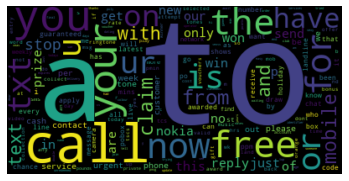

In [13]:
wordcloud = wc()
wordcloud.generate_from_frequencies(spam_freq)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h3>6.  Calculate $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$</h3>
<p>Next create a new DataFrame named word_prob that gives the probability of each word being found in a spam and ham message.</p>
<p>To calculate the probability of a word being spam you divide the number of times the word was found in spam by the total number of spam messages, likewise to calculate the probability of each word being found in a ham message you divide the number of times the word was found in a ham message by the total number of ham messages.</p>
<p>If a word was not found in ham or spam it will cause problems later because the probability calculated will be zero. Therefore, use a pseudocount k and estimate the probability of seeing the word. This is known as smoothing and results in the following formula when k = 0.5, for example.</p>
<p>$P\left(E\middle| S\right)$ = (number of spams containing the word + k) / (total number of spam messages + 2 * k).</p>
<p>Likewise, for $P\left(E|\lnot S\right)$.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>P(E|S)</th>
      <th>P(E|¬S)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>go</td>
      <td>0.053322</td>
      <td>0.050055</td>
    </tr>
    <tr>
      <th>1</th>
      <td>until</td>
      <td>0.011364</td>
      <td>0.004275</td>
    </tr>
    <tr>
      <th>2</th>
      <td>jurong</td>
      <td>0.002622</td>
      <td>0.000138</td>
    </tr>
    <tr>
      <th>3</th>
      <td>point</td>
      <td>0.002622</td>
      <td>0.002344</td>
    </tr>
    <tr>
      <th>4</th>
      <td>crazy</td>
      <td>0.011364</td>
      <td>0.002344</td>
    </tr>
  </tbody>
</table>
</p>[2 Marks]</p>


### Choosing K to be 1

In [14]:
total_spam = train_data['Category'][train_data['Category'] == 'spam'].count()
total_messages = train_data['Category'].count()
total_ham = total_messages - total_spam
k = 0.6
spam_prob = {}
for row in word_freq.index:
    word = word_freq.iloc[row]["Word"]
    spam_prob[word] = [(word_freq.iloc[row]["#Spam"] + k) / (total_spam + 2*k),
                                             (word_freq.iloc[row]["#Ham"] + k) / (total_ham + 2*k)]

In [15]:
word_prob = pd.DataFrame.from_dict(spam_prob).transpose()\
                        .reset_index()\
                        .rename(columns={"index": "Word",0:"P(E|S)", 1:"P(E|¬S)"})
word_prob

,Word,P(E|S),P(E|¬S)
0,convey,0.001041,0.001831
1,my,0.013190,0.157717
2,regards,0.001041,0.001553
3,to,0.926067,0.319705
4,him,0.004512,0.023189
...,...,...,...
7243,cedar,0.001041,0.000444
7244,portal,0.001041,0.000444
7245,smarter,0.001041,0.000444
7246,cashto,0.002777,0.000166


<h3>7. Checking the 'spamliness' of a single word</h3>
<p>Now that we have trained the model, we will test the model.  Before we use the test_data, first let’s check how the model calculates the spamliness of a single word.  This is where we use the Bayes Theorem formula.  We have already calculated $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$, so we can just extract these values from the word_prob DataFrame.</p>
<p>We need to decide on the prior values $P\left(S\right)$ and $P\left(\lnot S\right)$, this is where you can experiment and tweak the model, in this example the prior value for spam was set to $0.4$ and the prior value for not spam or ham was set to $0.6$.</p>
<h3>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h3>
<pre>
Output
Word = ['free']
P(E|S) = [0.29108392]
P(E|¬S) = [0.01365141]
P(S|E) = [0.93427577]
P(¬S|E) = [0.06572423]
</pre>

<p>[2 Marks]</p>

In [16]:
def spam_probs(s,es,e_not_s):
    return es*s/((es*s)+ (e_not_s*(1-s)))

In [17]:
free = word_prob[word_prob["Word"] == 'free']
free

,Word,P(E|S),P(E|¬S)
100,free,0.282194,0.014867


In [18]:
es = free["P(E|S)"]
e_not_s = free["P(E|¬S)"]
spam = spam_probs(0.4, es, e_not_s)
ham_probs = 1 - spam

print("Word = ['%s']\nP(E|S) = %f\nP(E|¬S) = %f\nP(S|E) = %f\nP(¬S|E) %f" % (free.at[100,"Word"], es, e_not_s, spam, ham_probs))

Word = ['free']
P(E|S) = 0.282194
P(E|¬S) = 0.014867
P(S|E) = 0.926760
P(¬S|E) 0.073240


<h3>8. Checking the 'spamliness' of several words</h3>
<p>To check the spamliness of several words contained in a message we multiply the probabilities.  The model assumes the words appear as independent events hence the naïve Bayes.  In reality of course, words are not independent events, but the model still performs well.  So we use the assumption that the words appear independently, and hence we multiply probabilities, so
$P(S\,|\, x_1,\dots,x_n)\approx \frac{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)}{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)+P(\neg S)\underset{i=1}{\overset{n}{\prod}}P(x_i | \neg S)}$

Calculate the probability for each word in a message being spam, you might want to store the calculations in a list named prob_spam.  Likewise create a list for each word not being spam.
Then multiply the probabilities and compare the results.  If the result of multiplying the probabilities for spam is greater than the result of multiplying the probabilities for not spam, then you assume the message as spam.
</p>
<p>If you have a word in your message that is not in the word_prob DataFrame then you can't get the probability.  Skip any words in the message that are not in the word_prob DataFrame.</p>
<p>[2 Marks]</p>

In [19]:
possible_message = "Hey baby wanna hangout"
prob_spam = []
prob_ham = []
for word in possible_message.split():
    if np.isin(word, word_prob["Word"].values):
        prob_spam.append(word_prob[word_prob["Word"] == word]["P(E|S)"])
        prob_ham.append(word_prob[word_prob["Word"] == word]["P(E|¬S)"])

In [20]:
spam_result = 1
for spam in prob_spam:
    spam_result *= float(spam)
ham_result = 1
for ham in prob_ham:
    ham_result *= float(ham)
print("spam", spam_result, "ham", ham_result, "abs", ham_result - spam_result)

spam 6.734809119967672e-05 ham 4.103568782737225e-05 abs -2.6312403372304473e-05


In [21]:
spam_sentence = spam_probs(0.4, spam_result,ham_result)
spam_sentence

0.5224766737858781

### The sentence given above is a spam

<h3>9. Avoiding floating point underflow</h3>
<p>Multiplying a set of small probabilities could result in a floating-point error.  This is where the product becomes too small to be represented correctly.  To avoid this we can take the logarithm of the probabilities and add them.  

To avoid multiplication of small numbers, we use the following property of $\log(x):$</p>
$$
\log(a\cdot b)=\log(a)+\log(b)
$$
<p>i.e. the log of the product is equal to the sum of logs (so instead of multiplying small numbers we will add them):</p>
$$
P(S|x_1,x_2,\dots,x_N)=P(S)\cdot P(x_1|S)\cdot \dots \cdot P(x_N|S)$$
<p>becomes</p>
$$\log(P(S|x_1,x_2,\dots,x_N))=\log\left(P(S)\cdot P(x_1|S)\cdot \dots  P(x_N|S)\right)=$$ $$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_N|S))
$$
<p>So, to check spam or ham we just compare:</p>
$$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_N|S))
$$
<p>and </p>
$$
\log(P(\neg S))+\log(P(x_1|\neg S))+\dots+\log(P(x_N|\neg S))
$$


Change the equation so that logs are used.
</p>
<p>[1 Mark]</p>

In [22]:
possible_message = "Hey baby wanna hangout"
prob_spam = [math.log10(0.6)]
prob_ham = [math.log10(0.4)]
for word in possible_message.split():
    if np.isin(word, word_prob["Word"].values):
        prob_spam.append(math.log2(word_prob[word_prob["Word"] == word]["P(E|S)"]))
        prob_ham.append(math.log2(word_prob[word_prob["Word"] == word]["P(E|¬S)"]))

In [23]:
spam_sum = 0 
ham_sum = 0
for spam_word in prob_spam:
    spam_sum += spam_word
for ham_word in prob_ham:
    ham_sum += ham_word
print("spam", spam_sum, "ham", ham_sum, "abs", spam_sum - ham_sum)

spam -14.079852167092909 ham -14.970701347605502 abs 0.8908491805125927


<h3>10. Testing the Model</h3>
<p>Now that we have tested the model using simple messages.  Let’s test the model using the messages from the test_set.  You should implement counters that displays how your model has performed and calculate the accuracy of the model.</p>
<pre>
match_spam 173
match_ham 843
thought_ham_is_spam 3
thought_spam_is_ham 357
Accuracy: 0.7383720930232558
</pre>
<p>[3 Marks]</p>


In [28]:
def sentence_probability (possible_message) -> bool:
    prob_spam = [math.log10(0.6)]
    prob_ham = [math.log10(0.4)]
    for word in possible_message.split():
        if np.isin(word, word_prob["Word"].values):
            prob_spam.append(math.log2(word_prob[word_prob["Word"] == word]["P(E|S)"]))
            prob_ham.append(math.log2(word_prob[word_prob["Word"] == word]["P(E|¬S)"]))
    spam_sum = 0 
    ham_sum = 0
    for spam_word in prob_spam:
        spam_sum += spam_word
    for ham_word in prob_ham:
        ham_sum += ham_word

    if spam_sum > ham_sum:
        return True
    else:
        return False

In [29]:
match_spam = 0
match_ham = 0
thought_ham_is_spam = 0 
thought_spam_is_ham = 0
for row in  test_data.index:
    category = test_data.loc[row]["Category"]
    sentence_spam = sentence_probability(test_data.loc[row]["Message"])
    if category == "spam" and sentence_spam:
        match_spam += 1
    elif category == "spam" and not sentence_spam:
        thought_spam_is_ham += 1
    elif category == "ham" and not sentence_spam:
        match_ham += 1
    elif category == "ham" and sentence_spam:
        thought_ham_is_spam += 1

accuracy = (match_spam + match_ham) / (match_spam + match_ham + thought_ham_is_spam + thought_spam_is_ham)
accuracy = accuracy *100
print("match_spam: %d \nmatch_ham: %d \nthought_ham_is_spam: %d\nthought_spam_is_ham: %d\naccuracy: %f" %(match_spam,
                                                                                        match_ham,
                                                                                        thought_ham_is_spam,
                                                                                        thought_spam_is_ham, accuracy))

match_spam: 171 
match_ham: 1015 
thought_ham_is_spam: 206
thought_spam_is_ham: 1
accuracy: 85.139986


<h3>11. Improvements</h3>
<p>Give some suggestions or recommendations on how the accuracy of the model could be improved.</p>
<p>[1 Mark]</p>
give lower spam value to the most commonly used words in English